# Anomaly score prediction model

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Loading data and reading data
df = pd.read_csv('C:/Users/FILI DANI/Downloads/Book1.csv')
print(df.head())

        Date   Time  Temperature (°C)  Humidity (%)  Sound Volume (dB)  \
0  10/1/2022   8:00              25.1          65.0               40.5   
1  10/1/2022   9:00              27.3          68.0               43.5   
2  10/1/2022  10:00              23.6          62.0               36.2   
3  10/2/2022   8:00              26.1          64.0               40.1   
4  10/2/2022   9:00              29.3          75.0               48.4   

   Anomaly Score  Turbine Efficiency  
0            0.0                 0.8  
1            0.5                 0.8  
2            0.6                 0.8  
3            0.0                 0.8  
4            0.6                 0.8  


Data Cleaning

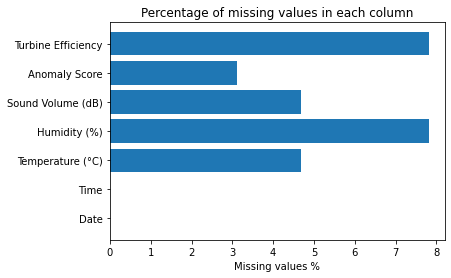

In [48]:
# Checking for missing values
fig , ax = plt.subplots()
ax.barh(df.columns,df.isnull().mean() * 100)
ax.set_xlabel('Missing values %')
ax.set_title('Percentage of missing values in each column')
plt.show()

In [49]:
# Handling missing values with mean value
for col in df.columns:
    if df[col].dtype != type(object):
        mean = SimpleImputer(missing_values=np.nan,strategy='mean')
        df[col] = mean.fit_transform(df[[col]])

In [50]:
# Dropping unnecessary columns
df = df.drop(columns=['Date','Time','Turbine Efficiency'])

Model training

In [51]:
# Deriving the input and output variables and splitting the dataset into training and testing dataset
x = df.loc[:,['Temperature (°C)','Humidity (%)','Sound Volume (dB)']]
y = df.loc[:,'Anomaly Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

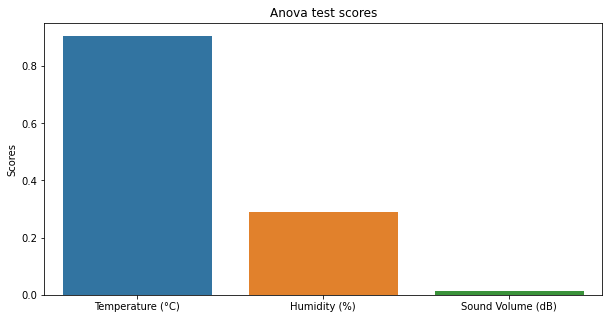

In [52]:
# Appliying feature selection
best_features = SelectKBest(score_func=f_regression,k=3)
best_features.fit_transform(x_train,y_train)
fig , ax = plt.subplots(figsize=(10,5))
sns.barplot(x=['Temperature (°C)','Humidity (%)','Sound Volume (dB)'],y=best_features.scores_)
ax.set_ylabel('Scores')
ax.set_title('Anova test scores')
plt.show()

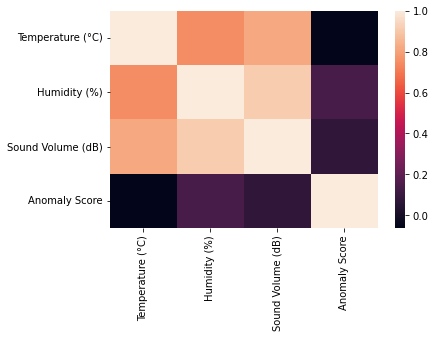

In [53]:
fig , ax = plt.subplots()
sns.heatmap(df.corr())
plt.show()

In [54]:
# Linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [55]:
# Trainig accuracy for linear regression model
linear_accuracy_train = r2_score(y_train,linear_model.predict(x_train))
print(linear_accuracy_train)

0.08473473659941622


In [56]:
# Testing accuracy for linear regression model
linear_accuracy_test = r2_score(y_test,linear_model.predict(x_test))
print(linear_accuracy_test)

0.005409960083345489


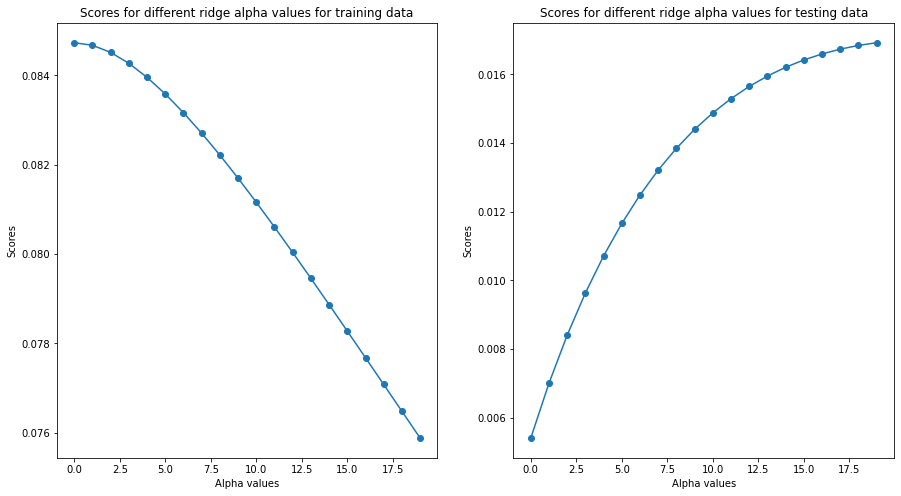

   Alpha values  Ridge accuracy train  Ridge accuracy test  Total score
9             9              0.081699             0.014401       0.0961


In [57]:
# Ridge model
ridge_accuracy_train = []
ridge_accuracy_test = []
values = range(0,20)
for ridge in values:
    ridge_model = Ridge(alpha=ridge)
    ridge_model.fit(x_train,y_train)
    ridge_accuracy_train.append(r2_score(y_train,ridge_model.predict(x_train)))
    ridge_accuracy_test.append(r2_score(y_test,ridge_model.predict(x_test)))
fig , ((ax1,ax2)) = plt.subplots(1,2,figsize=(15,8))
ax1.plot(values,ridge_accuracy_train,marker='o',linestyle='-')
ax2.plot(values,ridge_accuracy_test,marker='o',linestyle='-')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Scores')
ax1.set_title('Scores for different ridge alpha values for training data')
ax2.set_xlabel('Alpha values')
ax2.set_ylabel('Scores')
ax2.set_title('Scores for different ridge alpha values for testing data')
plt.show()
df_ridge = pd.DataFrame({'Alpha values':values,'Ridge accuracy train':ridge_accuracy_train,
                         'Ridge accuracy test':ridge_accuracy_test})
df_ridge['Total score'] = df_ridge['Ridge accuracy train'] + df_ridge['Ridge accuracy test']
max_ridge_value = df_ridge['Total score'].max()
max_ridge_score = df_ridge[df_ridge['Total score'] == max_ridge_value]
print(max_ridge_score)

C:\Users\FILI DANI\AppData\Local\Temp\ipykernel_1792\2077469451.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(x_train,y_train)
C:\Users\FILI DANI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\FILI DANI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+00, tolerance: 2.217e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

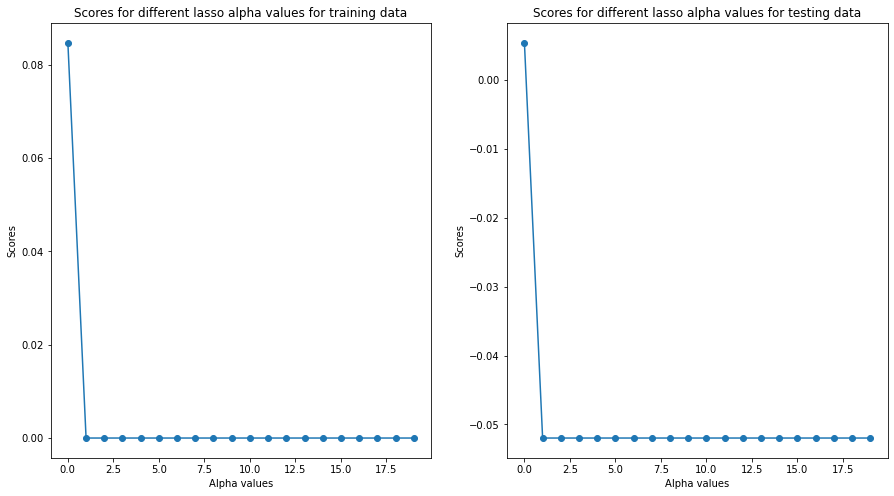

   Alpha values  Lasso accuracy train  Lasso accuracy test  Total score
0             0              0.084735              0.00541     0.090145


In [58]:
# Lasso model
lasso_accuracy_train = []
lasso_accuracy_test = []
for lasso in values:
    lasso_model = Lasso(alpha=lasso)
    lasso_model.fit(x_train,y_train)
    lasso_accuracy_train.append(r2_score(y_train,lasso_model.predict(x_train)))
    lasso_accuracy_test.append(r2_score(y_test,lasso_model.predict((x_test))))
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
ax1.plot(values,lasso_accuracy_train,marker='o',linestyle='-')
ax2.plot(values,lasso_accuracy_test,marker='o',linestyle='-')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Scores')
ax1.set_title('Scores for different lasso alpha values for training data')
ax2.set_xlabel('Alpha values')
ax2.set_ylabel('Scores')
ax2.set_title('Scores for different lasso alpha values for testing data')
plt.show()
df_lasso = pd.DataFrame({'Alpha values':values,'Lasso accuracy train':lasso_accuracy_train,
                        'Lasso accuracy test':lasso_accuracy_test})
df_lasso['Total score'] = df_lasso['Lasso accuracy train'] + df_lasso['Lasso accuracy test']
max_lasso_value = df_lasso['Total score'].max()
max_lasso_score = df_lasso[df_lasso['Total score'] == max_lasso_value]
print(max_lasso_score)

In [59]:
# Decision tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
# Training and testing accuracy for decision tree model
decision_tree_accuracy_train = r2_score(y_train,decision_tree_model.predict(x_train))
decision_tree_accuracy_test = r2_score(y_test,decision_tree_model.predict(x_test))
print(decision_tree_accuracy_train)
print(decision_tree_accuracy_test)

0.9639071266321456
0.34226190476190466


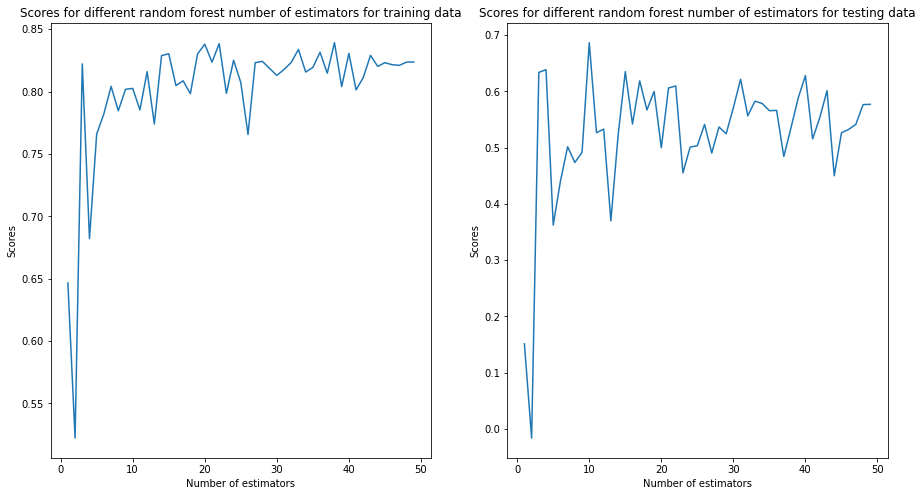

   Number of estimators  Random forest accuracy train  \
9                    10                      0.802535   

   Random forest accuracy test  Total score  
9                     0.686473     1.489007  


In [61]:
# Random Forest model
random_forest_accuracy_train = []
random_forest_accuracy_test = []
estimators = range(1,50)
for value in estimators:
    random_forest_model = RandomForestRegressor(n_estimators=value,max_depth=3)
    random_forest_model.fit(x_train,y_train)
    random_forest_accuracy_train.append(r2_score(y_train,random_forest_model.predict(x_train)))
    random_forest_accuracy_test.append(r2_score(y_test,random_forest_model.predict(x_test)))
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
ax1.plot(estimators,random_forest_accuracy_train)
ax1.set_xlabel('Number of estimators')
ax1.set_ylabel('Scores')
ax1.set_title('Scores for different random forest number of estimators for training data')
ax2.plot(estimators,random_forest_accuracy_test)
ax2.set_xlabel('Number of estimators')
ax2.set_ylabel('Scores')
ax2.set_title('Scores for different random forest number of estimators for testing data')
plt.show()
df_random_forest = pd.DataFrame({'Number of estimators':estimators,'Random forest accuracy train':random_forest_accuracy_train,
                                'Random forest accuracy test':random_forest_accuracy_test})
df_random_forest['Total score'] = df_random_forest['Random forest accuracy train'] + df_random_forest['Random forest accuracy test']
max_random_forest_value = df_random_forest['Total score'].max()
max_random_forest_score = df_random_forest[df_random_forest['Total score'] == max_random_forest_value]
print(max_random_forest_score)

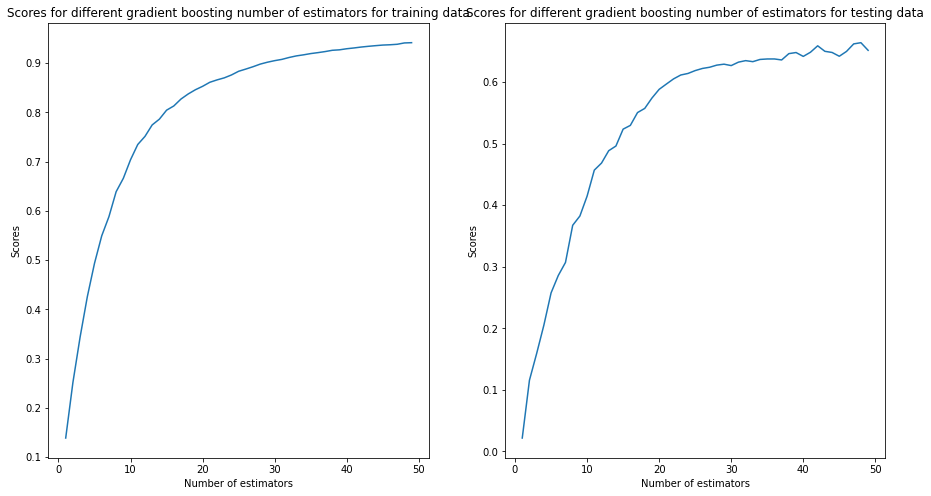

    Number of estimators  Gradient boosting accuracy train  \
47                    48                          0.941102   

    Gradient boosting accuracy test  Total score  
47                         0.664006     1.605108  


In [62]:
# Gradient Boosting model
gradient_boosting_accuracy_train = []
gradient_boosting_accuracy_test = []
for values in estimators:
    gradient_boosting_model = GradientBoostingRegressor(n_estimators=values,max_depth=3)
    gradient_boosting_model.fit(x_train,y_train)
    gradient_boosting_accuracy_train.append(r2_score(y_train,gradient_boosting_model.predict(x_train)))
    gradient_boosting_accuracy_test.append(r2_score(y_test,gradient_boosting_model.predict(x_test)))
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
ax1.plot(estimators,gradient_boosting_accuracy_train)
ax1.set_xlabel('Number of estimators')
ax1.set_ylabel('Scores')
ax1.set_title('Scores for different gradient boosting number of estimators for training data')
ax2.plot(estimators,gradient_boosting_accuracy_test)
ax2.set_xlabel('Number of estimators')
ax2.set_ylabel('Scores')
ax2.set_title('Scores for different gradient boosting number of estimators for testing data')
plt.show()
df_gradient_boosting = pd.DataFrame({'Number of estimators':estimators,
                                    'Gradient boosting accuracy train':gradient_boosting_accuracy_train,
                                   'Gradient boosting accuracy test':gradient_boosting_accuracy_test})
df_gradient_boosting['Total score'] = df_gradient_boosting['Gradient boosting accuracy train'] + df_gradient_boosting['Gradient boosting accuracy test']
max_gradient_boosting_value = df_gradient_boosting['Total score'].max()
max_gradient_boosting_score = df_gradient_boosting[df_gradient_boosting['Total score'] == max_gradient_boosting_value]
print(max_gradient_boosting_score)

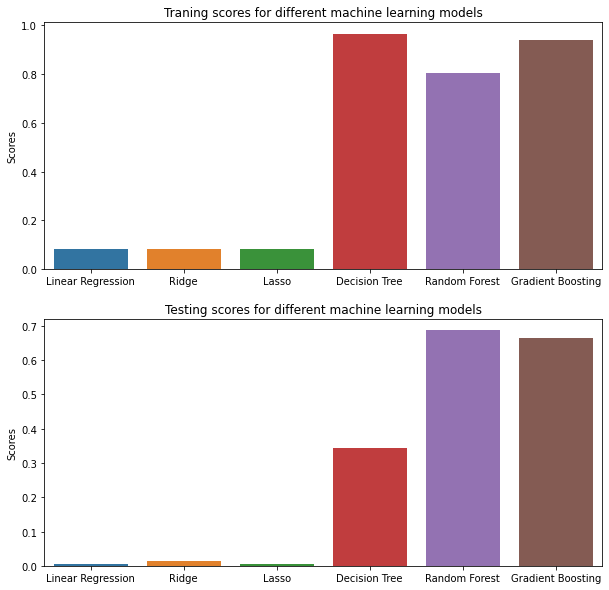

In [64]:
# Checkiing for the best model in regards to accuracy in both training and testing dataset
fig , ((ax1),(ax2)) = plt.subplots(2,1,figsize=(10,10))
sns.barplot(y=[0.08473473659941622,0.081699,0.084735,0.9639071266321456,0.802535,0.941102],
            x=['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','Gradient Boosting'],
           ax=ax1)
ax1.set_title('Traning scores for different machine learning models')
ax1.set_ylabel('Scores')
sns.barplot(y=[0.005409960083345489,0.014401,0.00541,0.34226190476190466,0.686473,0.664006],
           x=['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','Gradient Boosting'],
             ax=ax2)
ax2.set_title('Testing scores for different machine learning models')
ax2.set_ylabel('Scores')
plt.show()

In [65]:
# Training using the best model, Gradint boosting 
model = GradientBoostingRegressor(n_estimators=48,max_depth=3)
model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=48)

In [66]:
# Packaging the model using pickle
import pickle

In [67]:
pickle.dump(model,open('model.pkl','wb'))